<h1>Descripción del Problema</h1>
Se dispone de una base de datos que registra el rendimiento diario de diferentes palas y
camiones de transporte de mineral. La información con la que se cuenta es la cantidad de
tonelaje movido durante un día de operación y el número de paladas.
El objetivo principal es identificar los equipos de mejor rendimiento en términos de
tonelaje extraído por día, así como los principales factores que influyen en esta
métrica.

<h2>Diccionario de datos</h2>
A continuación, se presenta el diccionario de las variables de la base de datos:

<img src="Variables implicadas.png" />

<h2>Descripción del Código</h2>
<h3>1. Carga de Datos</h3>
Preparación del entorno de trabajo utilizando las siguientes librerías:<br>
Pandas, Numpy, Matplotlib, Seaborn, Plotly: Para análisis exploratorio y visualización interactiva.<br>
Sklearn y Statsmodels: Para modelado predictivo y análisis de series de tiempo.<br>
Se lee el archivo .csv que contiene los registros diarios de rendimiento de los equipos de carguío y transporte de mineral (CAEX y palas). Este archivo incluye información clave como tonelaje, ciclos del equipo, distancia recorrida y fechas.
Se verifica la estructura del dataset para asegurar la integridad de los datos.
<h3>2. Preprocesamiento</h3>
Conversión de fechas: La columna de fechas se convierte a formato datetime para facilitar el análisis temporal.<br>
Limpieza de datos: Se gestionan valores nulos o inválidos, reemplazando valores infinitos y eliminando filas con NaN en variables críticas como eficiencia_ciclo, tonelaje y distancia.<br>
Este paso asegura que los datos sean adecuados para el análisis y evita errores en el modelado.<br>
<h3>3. Exploración</h3>
Análisis estadístico descriptivo de las variables principales:<br>
Eficiencia por ciclo: Tonelaje transportado dividido por el ciclo de carguío.<br>
Análisis temporal: Visualización de las series de tiempo del ciclo total del camión y su relación con el tonelaje transportado.<br>
Gráficos exploratorios: Gráficos de dispersión y series temporales para entender las relaciones clave entre variables.<br>
<h3>4. Análisis de Rendimiento de los Equipos</h3>
Análisis de eficiencia de los equipos en series de tiempo, media móvil y tendencias:<br>
4.1 Serie de tiempo, media móvil y tendencia del ciclo del CAEX.<br>
4.2 Serie de tiempo, media móvil y tendencia del ciclo de la Pala. <br>
4.3 Relación entre tonelaje movido y ciclo del camión. <br>
4.4 Eficiencia de tonelaje por ciclo: camiones y palas. <br>
<h3>5. Ranking de Rendimiento</h3>
Cálculo del rendimiento de los equipos en operaciones: <br>
5.1 Calculo y ranking de rendimiento diario.<br>
5.1.1 Ranking de rendimiento de los equipos CAEX por puntaje total. <br>
5.2 Análisis de productividad: paladas por ciclo. <br>
5.3 Identificación de las mejores combinaciones de pala y CAEX.<br>
5.4 Ranking de rendimiento de las palas. <br>
5.5 Desempeño de los equipos de carguío y transporte. <br>
5.6 Rendimiento de los equipos CAEX a lo largo del tiempo. <br>
5.7 Rendimiento de las palas a lo largo del tiempo. <br>
5.8 Identificación de factores críticos. <br>
<h3>6. Modelado Predictivo</h3>
Aplicación de modelos para predecir el rendimiento:<br>
Modelo ARIMA: Para prever los tiempos de ciclo de los camiones en función de los datos históricos.<br>
Regresión lineal con Sklearn: Para identificar las combinaciones más eficientes de pala y CAEX.<br>
Statsmodels: Para ajuste y análisis predictivo de series temporales.<br>
<h3>7. Análisis Estadístico para Identificar Factores Criticos.</h3>
7.1 Importancia de las variables predictoras en la regresión lineal.<br>
7.2 Conclusión de factores críticos:<br>
Eficiencia de carguío: Influencia del tonelaje por ciclo.<br>
Distancia recorrida: Impacto tanto en vacío como en lleno.<br>
Número de paladas necesarias: Efecto en el tiempo total del ciclo.<br>
Ciclos del camión y la pala: Sincronización y tiempo de espera.<br>
Estas variables son determinantes para evaluar la productividad en las operaciones de transporte y carguío.<br>

<h3>8. Propuesta de Mejora Operativa</h3>
Recomendaciones basadas en el análisis:<br>
Optimización de la distancia recorrida: Reducir la distancia entre la zona de carguío y descarga.<br>
Mejora en la sincronización entre pala y camión: Reducir tiempos de espera innecesarios.<br>
Monitoreo continuo de eficiencia: Implementar modelos predictivos para anticipar caídas en la productividad.<br>



<h2> Preparar el ambiente de trabajo con las librerias necesarias</h2>

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

print("importacion de librerias con exito")

importacion de librerias con exito


<h2>1. Cargar los datos</h2>

In [2]:
#  Cargar los datos
df = pd.read_csv(r"C:\Users\mizai\OneDrive\Desktop\Prueba tecnica para Data Sciencie - Andesite\timeseries_haul_loading_data.csv")

In [3]:
#  Verificar la estructura del dataset
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395680 entries, 0 to 395679
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   truck               395680 non-null  object 
 1   loader              395680 non-null  object 
 2   ton                 395680 non-null  float64
 3   n_shovel            395680 non-null  float64
 4   truck_total_cycle   395680 non-null  float64
 5   loader_total_cycle  395680 non-null  float64
 6   distance_empty      395680 non-null  float64
 7   distance_full       395680 non-null  float64
 8   date                395680 non-null  object 
dtypes: float64(6), object(3)
memory usage: 27.2+ MB
None
    truck loader         ton  n_shovel  truck_total_cycle  loader_total_cycle  \
0  CAEX56   PH06  299.682208       3.0             2158.0               315.0   
1  CAEX64   PH48  316.673117       3.0             1737.0               353.0   
2  CAEX41   PH06  340.529701       3.0 

<h2> 2. Preprocesamiento de datos</h2>

In [4]:
# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])
# Verificar si hay valores nulos
print(df.isnull().sum())

truck                 0
loader                0
ton                   0
n_shovel              0
truck_total_cycle     0
loader_total_cycle    0
distance_empty        0
distance_full         0
date                  0
dtype: int64


<h2>3. Exploración de los datos</h2>

In [5]:
# Estadísticas descriptivas
print(df.describe())

                 ton       n_shovel  truck_total_cycle  loader_total_cycle  \
count  395680.000000  395680.000000      395680.000000       395680.000000   
mean      318.007490       3.316556        2284.313481          305.073340   
std        18.124753       0.558689         856.620246          116.657122   
min         0.000000       3.000000          23.000000            0.000000   
25%       305.666647       3.000000        1633.000000          217.000000   
50%       317.758250       3.000000        2134.000000          303.000000   
75%       330.125978       4.000000        2945.000000          390.000000   
max       384.927167      15.000000       15812.000000        11692.000000   

       distance_empty  distance_full  
count   395680.000000  395680.000000  
mean      6161.241612    5782.712235  
std       2569.465489    2355.404982  
min        512.000000     504.000000  
25%       3931.000000    3754.000000  
50%       6009.000000    5412.000000  
75%       8059.000000   

<h3> Nota:</h3>
Promedio de tonelaje en un ciclo : 384.927167<br>
promedio paladas necesarias para cargar el camión: 3.316556<br>
promedio cada palada en ton: 116,0623149<br>
distancia en vacio en (m): 512  <br>
distancia lleno en (m): 504 <br>
promedio de ciclo de CAEX en (s): 2284.313481<br>
promedio de ciclo de pala en (s): 305.073340 <br>


<h2>4. Análisis de rendimiento de los equipos:</h2>

<h2> Serie de tiempo del ciclo total del camión </h2>

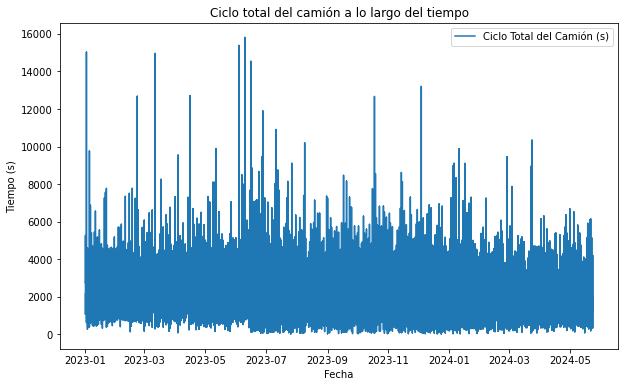

In [6]:
# Graficar la serie de tiempo del ciclo total del camión
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['truck_total_cycle'], label='Ciclo Total del Camión (s)')
plt.xlabel('Fecha')
plt.ylabel('Tiempo (s)')
plt.title('Ciclo total del camión a lo largo del tiempo')
plt.legend()
plt.show()

<h3>Nota:</h3>
Se observan fluctuaciones significativas en el tonelaje transportado a lo largo del tiempo, lo que podría estar relacionado con cambios en las condiciones operativas (turnos, mantenimientos, disponibilidad de equipos).<br>
Área de mejora:<br>
Se sugiere investigar las causas de los aumentos en los tiempos de los ciclos, pueden estar relacionados a eventos de mantencion del equipo o desperfecto.

<h2>4.1 Grafico de la serie de tiempo, media móvil y tendencia del ciclo de operacion del CAEX.</h2>

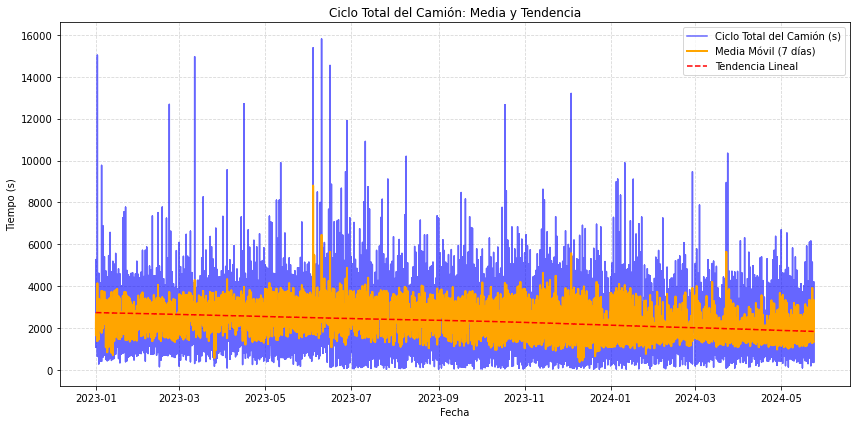

In [7]:
from scipy.stats import linregress

# Calcular la media móvil para suavizar los datos
df['media_movil'] = df['truck_total_cycle'].rolling(window=7).mean()  # Media móvil con ventana de 7 días

# Ajustar una línea de tendencia usando regresión lineal
slope, intercept, _, _, _ = linregress(range(len(df)), df['truck_total_cycle'])
df['tendencia'] = slope * range(len(df)) + intercept

# Graficar la serie de tiempo, media móvil y tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['truck_total_cycle'], label='Ciclo Total del Camión (s)', alpha=0.6, color='blue')
plt.plot(df['date'], df['media_movil'], label='Media Móvil (7 días)', linewidth=2, color='orange')
plt.plot(df['date'], df['tendencia'], label='Tendencia Lineal', linestyle='--', color='red')

# Agregar etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Tiempo (s)')
plt.title('Ciclo Total del Camión: Media y Tendencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<h3>Nota:</h3>
Entre el 2023-01 y el 2023-07 es donde se presentan mayor cantidad eventos que aumentaron los tiempos del ciclo,
a pesar de la disminucion de eventos a partir del 2023-07 la linea de tendencia indica a la baja en el tiempo de ciclo del camión lo cual es favorable.<br>

<h2>4.2 Grafico de la serie de tiempo, media y tendencia del ciclo de operacion de la Pala.</h2>


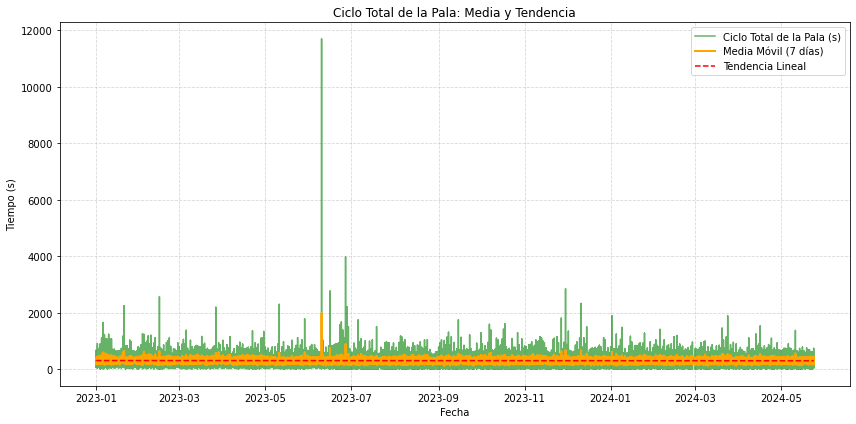

In [8]:
# Calcular la media móvil para suavizar los datos
df['media_movil_pala'] = df['loader_total_cycle'].rolling(window=7).mean()  # Media móvil con ventana de 7 días

# Ajustar una línea de tendencia usando regresión lineal
slope_pala, intercept_pala, _, _, _ = linregress(range(len(df)), df['loader_total_cycle'])
df['tendencia_pala'] = slope_pala * range(len(df)) + intercept_pala

# Graficar la serie de tiempo, media móvil y tendencia para las palas
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['loader_total_cycle'], label='Ciclo Total de la Pala (s)', alpha=0.6, color='green')
plt.plot(df['date'], df['media_movil_pala'], label='Media Móvil (7 días)', linewidth=2, color='orange')
plt.plot(df['date'], df['tendencia_pala'], label='Tendencia Lineal', linestyle='--', color='red')

# Agregar etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Tiempo (s)')
plt.title('Ciclo Total de la Pala: Media y Tendencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<h3>4.3 Relación entre tonelaje movido y ciclo del camión </h3>

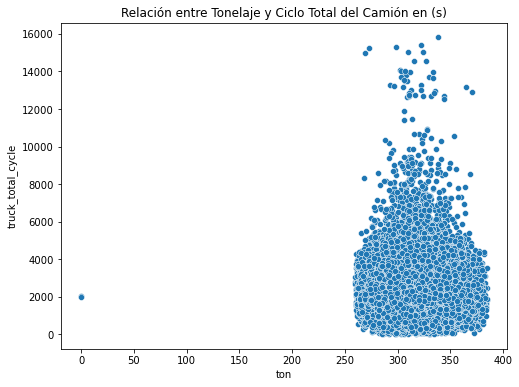

In [9]:
# Relación entre tonelaje y ciclo del camión
plt.figure(figsize=(8,6))
sns.scatterplot(x='ton', y='truck_total_cycle', data=df)
plt.title('Relación entre Tonelaje y Ciclo Total del Camión en (s)')
plt.show()

<h3>Nota:</h3>
Existe una correlación directa entre el tonelaje movido y el tiempo total del ciclo, en 0 y 6000 (s), siendo la media cercana a los 4000(s) es el rango de tiempo "normal" por ciclo de transporte de mineral, los ciclos mas largos que ese tramo de tiempo, pueden estar relacionado a tramos de transporte más largos o a algun evento de falla del equipo o anomalia en el ciclo (saturación en la cola de carga/descarga, falla en el equipo ,etc...)
<h4>Área de mejora:</h4><br>
Revisar los tramos recorridos por los camiones, revisar el registro de eventos y mantención de los equipos.

<h2>4.4 Eficiencia de Tonelaje por Ciclo: Camiones y Palas</h2>

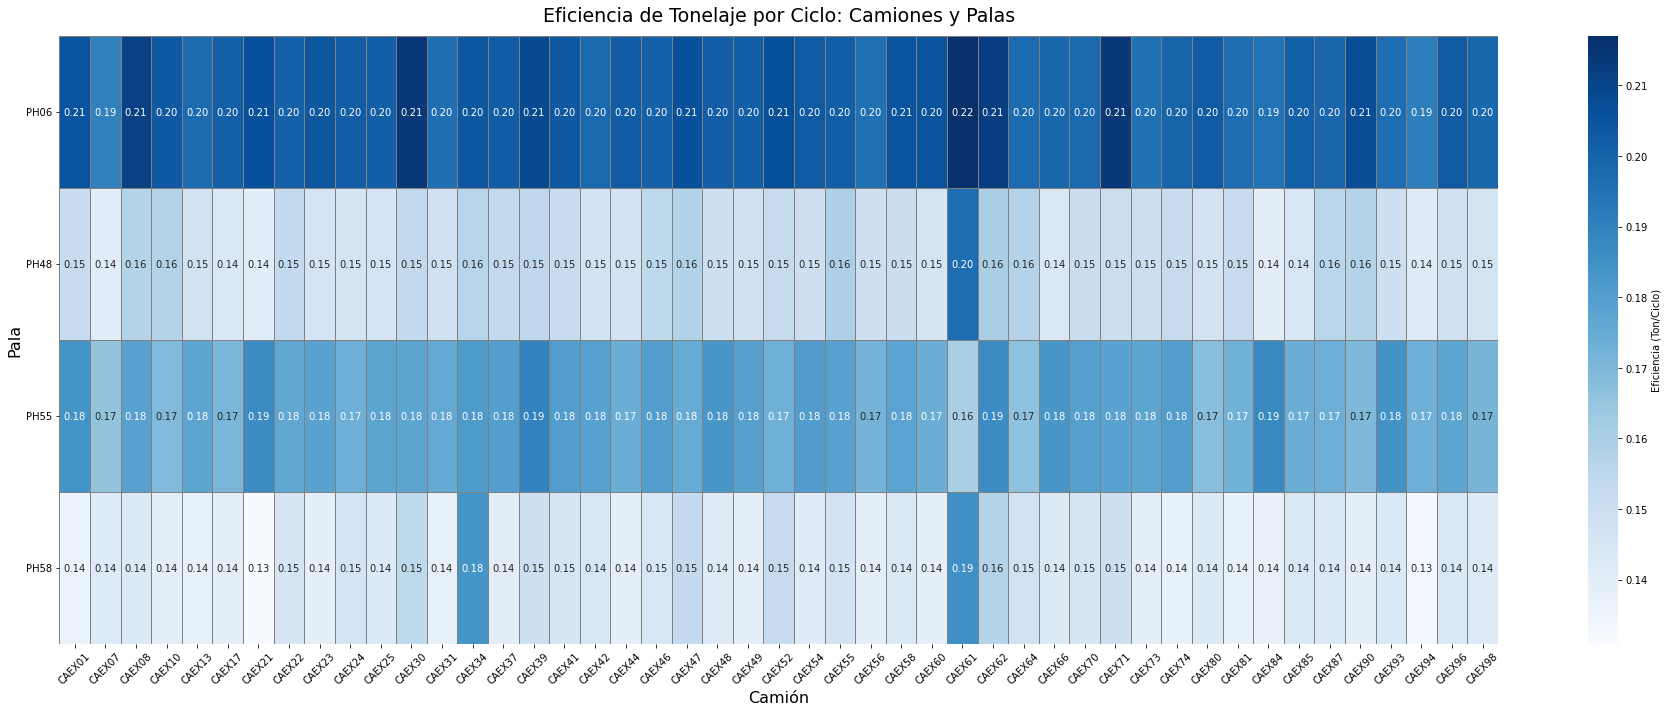

In [10]:
# Calcular la eficiencia (tonelaje por ciclo)
df['eficiencia_ciclo'] = df['ton'] / df['truck_total_cycle']

# Promedio de eficiencia por camión y pala
promedio_eficiencia = df.groupby(['truck', 'loader'])['eficiencia_ciclo'].mean().reset_index()

# Crear una matriz de eficiencia para el gráfico de calor
eficiencia_matriz = promedio_eficiencia.pivot(index='loader', columns='truck', values='eficiencia_ciclo')

# Crear el gráfico de calor
plt.figure(figsize=(26,10))
sns.heatmap(
    eficiencia_matriz, 
    annot=True, 
    fmt=".2f", 
    cmap='Blues', 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Eficiencia (Ton/Ciclo)'}
)

# Etiquetas y título
plt.title('Eficiencia de Tonelaje por Ciclo: Camiones y Palas', fontsize=19, pad=15)
plt.xlabel('Camión', fontsize=16)
plt.ylabel('Pala', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<h3> Nota:</h3>
El Camión CAEX61 fue el que tuvo mejor eficiencia en ciclo de carga con todas las palas y el CAEX94 con la menor promedio de eficiencia con todas las palas.

<h2>5. Ranking de rendimiento</h2>

<h2>Para desarrollar el Ranking de Rendimiento, debemos considerar las siguientes variables:</h2>

<h3>-Eficiencia de Carguío:</h3>
Tonelaje por Ciclo de Camión: Esta métrica evalúa cuánta carga transporta cada camión en relación con el ciclo total. Un mayor tonelaje por ciclo indica mayor eficiencia en el uso del equipo.
Fórmula: eficiencia_carguio = ton / truck_total_cycle
 *observacion en puntos anteriores se estipulo la variable : eficiencia_ciclo = eficiencia_carguio, por comodidad de variables se sigue usando la variable: eficiencia_ciclo
<h3>-Productividad por Pala:</h3>
Número de paladas por ciclo de camión: Cuanto menos tiempo tarda una pala en cargar un camión, mayor será su productividad.
Fórmula: productividad_pala = n_shovel / loader_total_cycle

<h3>-Ciclo Total del Camión:</h3>
Tiempo de ciclo del camión: La cantidad de tiempo que toma completar un ciclo completo (ir vacío, cargar, regresar lleno). Los camiones que logran ciclos más cortos suelen ser más eficientes.
Fórmula: truck_total_cycle = tiempo en segundos del ciclo completo

<h3>-Distancia Recorrida:</h3>
El rendimiento del camión también puede depender de la distancia recorrida. Los camiones que transportan eficientemente a distancias más largas podrían tener ventaja, pero también es importante controlar por esta variable para comparar camiones que trabajan en condiciones similares.
Fórmula: rendimiento_distancia = truck_total_cycle / (distance_empty + distance_full)

<h3>-Combinar las métricas en un ranking ponderado:</h3>
Puedes ponderar las métricas según su relevancia en el análisis de rendimiento (p. ej., 40% eficiencia de carguío, 30% ciclo total, 30% distancia recorrida). El resultado será un ranking final de rendimiento.

<h2> 5.1 Calculo y ranking de rendimiento diario.</h2>

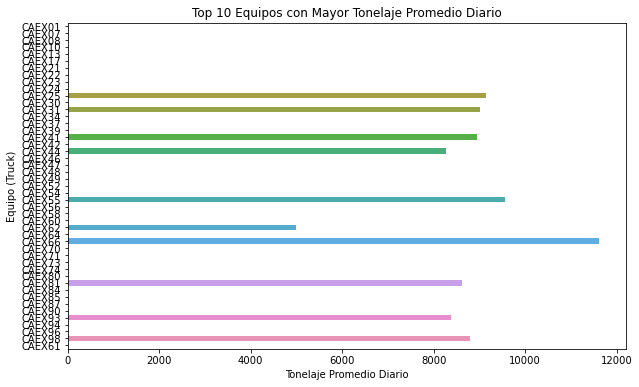

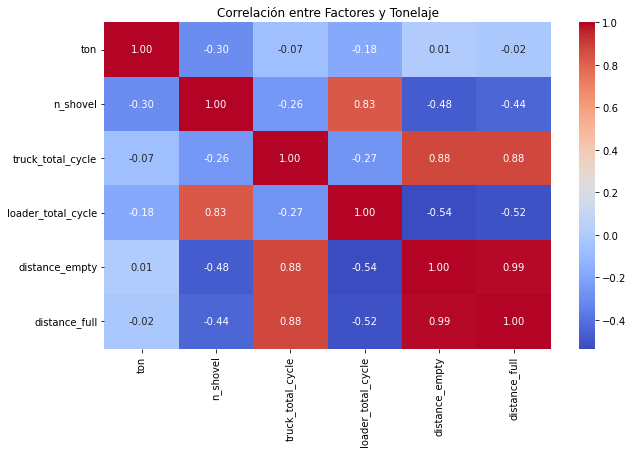

Factores principales que influyen en el tonelaje extraído:
ton                   1.000000
distance_empty        0.007986
distance_full        -0.015987
truck_total_cycle    -0.073106
loader_total_cycle   -0.181046
n_shovel             -0.298683
Name: ton, dtype: float64


In [5]:
# Cargar los datos optimizados
file_path = r'C:\Users\mizai\OneDrive\Desktop\Prueba tecnica para Data Sciencie - Andesite\timeseries_haul_loading_data.csv'
data = pd.read_csv(file_path, dtype={
    "truck": "category",
    "loader": "category",
    "ton": "float32",
    "n_shovel": "float32",
    "truck_total_cycle": "float32",
    "loader_total_cycle": "float32",
    "distance_empty": "float32",
    "distance_full": "float32",
    "date": "object"
})
data['date'] = pd.to_datetime(data['date'])

# Calcular el tonelaje diario por equipo
daily_performance = data.groupby(['truck', 'date'])['ton'].sum().reset_index()

# Identificar los equipos con mejor rendimiento promedio
top_performance = daily_performance.groupby('truck')['ton'].mean().sort_values(ascending=False).reset_index()

# Visualizar los equipos con mejor rendimiento
plt.figure(figsize=(10, 6))
sns.barplot(x='ton', y='truck', data=top_performance.head(10))
plt.title('Top 10 Equipos con Mayor Tonelaje Promedio Diario')
plt.xlabel('Tonelaje Promedio Diario')
plt.ylabel('Equipo (Truck)')
plt.show()

# Análisis de factores que influyen en el tonelaje
# Agrupar por equipo y calcular promedios de las variables relevantes
factor_analysis = data.groupby('truck')[['ton', 'n_shovel', 'truck_total_cycle', 'loader_total_cycle', 'distance_empty', 'distance_full']].mean()

# Visualizar correlaciones entre factores y tonelaje
plt.figure(figsize=(10, 6))
sns.heatmap(factor_analysis.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Factores y Tonelaje')
plt.show()

# Identificar factores principales con mayor correlación con tonelaje
correlations = factor_analysis.corr()['ton'].sort_values(ascending=False)
print("Factores principales que influyen en el tonelaje extraído:")
print(correlations)


In [11]:
# Calcular métricas de rendimiento

# a) Eficiencia de carguío (tonelaje por ciclo de camión)
#df['eficiencia_carguio'] = df['ton'] / df['truck_total_cycle'] ----> variable ya creada anteriormente.

# b) Productividad de la pala (paladas por ciclo de camión)
df['productividad_pala'] = df['n_shovel'] / df['loader_total_cycle']

# c) Rendimiento de la distancia recorrida
df['rendimiento_distancia'] = df['truck_total_cycle'] / (df['distance_empty'] + df['distance_full'])

#  Crear un puntaje general ponderado para el ranking
# Definimos las ponderaciones (ajustables según los criterios de importancia)
peso_eficiencia_carguio = 0.4
peso_productividad_pala = 0.3
peso_rendimiento_distancia = 0.3

# Calcular el puntaje ponderado
df['puntaje_total'] = (df['eficiencia_ciclo'] * peso_eficiencia_carguio +
                       df['productividad_pala'] * peso_productividad_pala +
                       df['rendimiento_distancia'] * peso_rendimiento_distancia)


<H2> 5.1.1 Ranking de rendimiento de los equipos CAEX por puntaje total</H2>

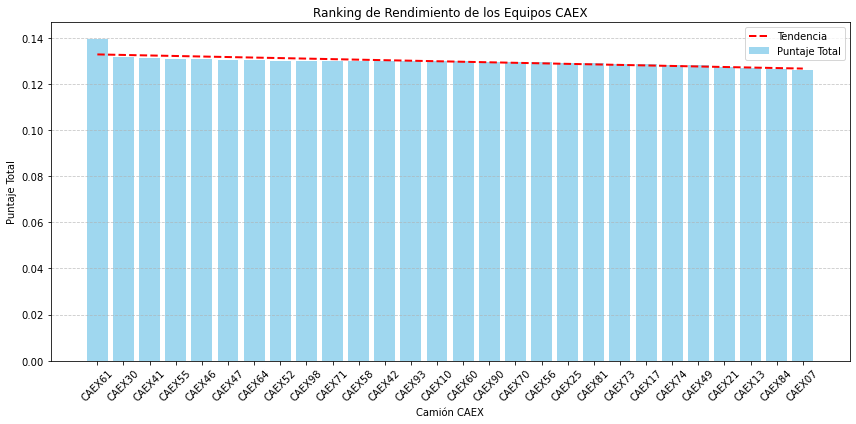

In [12]:
# Calcular el ranking agrupando por camión
ranking = df.groupby('truck')['puntaje_total'].mean().reset_index()
ranking = ranking.sort_values(by='puntaje_total', ascending=False)

# Verificar y limpiar los datos de puntaje_total
ranking = ranking.dropna(subset=['puntaje_total'])  # Eliminar filas con NaN en puntaje_total
ranking = ranking[ranking['puntaje_total'] != np.inf]  # Eliminar filas con valores infinitos

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
x = np.arange(len(ranking['truck']))  # Índices para las barras
plt.bar(x, ranking['puntaje_total'], color='skyblue', alpha=0.8, label='Puntaje Total')

# Ajustar la línea de tendencia (asegurar dimensiones correctas)
z = np.polyfit(x, ranking['puntaje_total'], 1)  # Ajuste lineal
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linestyle='--', linewidth=2, label='Tendencia')

# Configurar etiquetas y título
plt.xticks(x, ranking['truck'], rotation=45)
plt.xlabel('Camión CAEX')
plt.ylabel('Puntaje Total')
plt.title('Ranking de Rendimiento de los Equipos CAEX')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<h3>Nota:</h3> el puntaje más alto de rendimiento lo tuvo el equipo CAEX61, esto se puede deber a un mayor numeros de registro del equipo CAEX61 o a una mayor eficiencia respecto al resto de los equipos CAEX.


<h2>5.2 Análisis de productividad de las Paladas/Ciclos.</h2>

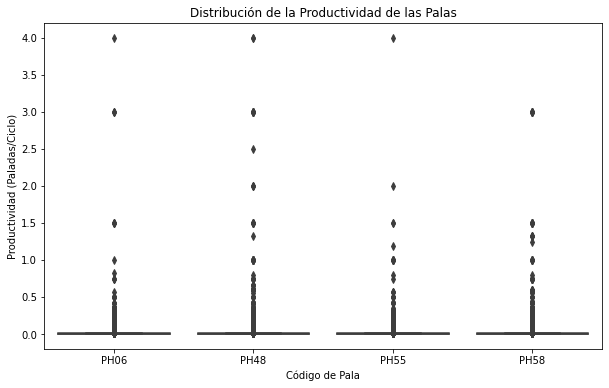

In [13]:
#  Análisis de productividad de las Paladas/Ciclos.
plt.figure(figsize=(10,6))
sns.boxplot(x='loader', y='productividad_pala', data=df)
plt.title('Distribución de la Productividad de las Palas')
plt.xlabel('Código de Pala')
plt.ylabel('Productividad (Paladas/Ciclo)')
plt.show()

<h2>5.3 Identificación de las Mejores Combinaciones de Pala y CAEX</h2>

In [14]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Preprocesar los datos: filtrar registros con valores válidos
df = df[(df['eficiencia_ciclo'] > 0) & (df['puntaje_total'] > 0)]

# Eliminar filas con valores NaN o infinitos en las columnas de interés
df = df.replace([np.inf, -np.inf], np.nan)  # Reemplazar valores infinitos con NaN
df = df.dropna(subset=['eficiencia_ciclo', 'productividad_pala', 'rendimiento_distancia','ton'])  # Eliminar filas con NaN

# Seleccionar las variables
X = df[['eficiencia_ciclo', 'productividad_pala', 'rendimiento_distancia']]
y = df['ton']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

# Calcular el rendimiento predicho por combinación de pala y CAEX
df['rendimiento_predicho'] = modelo.predict(X)

# Agrupar por pala y CAEX y visualizar el ranking
ranking_rendimiento = df.groupby(['loader', 'truck'])['rendimiento_predicho'].mean().reset_index()
ranking_rendimiento = ranking_rendimiento.sort_values(by='rendimiento_predicho', ascending=False)

# Visualización interactiva con Plotly
fig = px.scatter(ranking_rendimiento, 
                 x='loader', 
                 y='rendimiento_predicho', 
                 color='truck', 
                 hover_name='truck', 
                 labels={'rendimiento_predicho': 'Rendimiento Predicho','loader':'Codigo Palas'},
                 title='Ranking de Rendimiento entre Pala y CAEX')
fig.show()


MSE: 325.0450614957551
R²: 0.008865800939174995


<h2> 5.4 Ranking de rendimiento de los equipos Palas </h2>

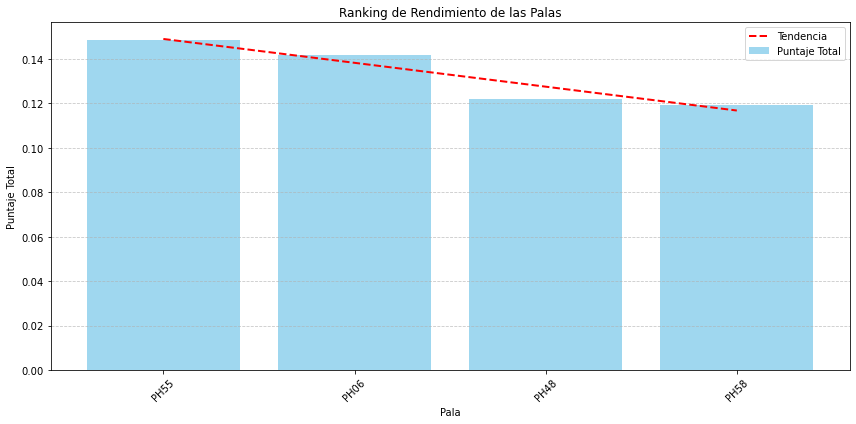

In [15]:
# Calcular el ranking agrupando por pala
ranking_palas = df.groupby('loader')['puntaje_total'].mean().reset_index()
ranking_palas = ranking_palas.sort_values(by='puntaje_total', ascending=False)

# Verificar y limpiar los datos de puntaje_total
ranking_palas = ranking_palas.dropna(subset=['puntaje_total'])  # Eliminar filas con NaN en puntaje_total
ranking_palas = ranking_palas[ranking_palas['puntaje_total'] != np.inf]  # Eliminar filas con valores infinitos

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
x = np.arange(len(ranking_palas['loader']))  # Índices para las barras
plt.bar(x, ranking_palas['puntaje_total'], color='skyblue', alpha=0.8, label='Puntaje Total')

# Ajustar la línea de tendencia (asegurar dimensiones correctas)
z = np.polyfit(x, ranking_palas['puntaje_total'], 1)  # Ajuste lineal
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linestyle='--', linewidth=2, label='Tendencia')

# Configurar etiquetas y título
plt.xticks(x, ranking_palas['loader'], rotation=45)
plt.xlabel('Pala')
plt.ylabel('Puntaje Total')
plt.title('Ranking de Rendimiento de las Palas')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<h3>Nota:</h3>
Los camiones CAEX61 y las palas PH55 y PH06 destacan como los equipos con mejor rendimiento promedio en términos de eficiencia y tonelaje movido.<br>
Algunos equipos muestran rendimientos consistentemente bajos, lo que podría indicar problemas mecánicos o de coordinación.<br>
Área de mejora:<br>
Redistribuir tareas críticas a los equipos de mayor rendimiento y priorizar el mantenimiento predictivo en los equipos con bajo rendimiento.


<h2>5.5 Desempeño de rendimiento de los equipos de Carguio y Transporte</h2>

In [16]:
#  Identificar equipos sin movimiento (con cero registros de tonelaje)
equipos_sin_movimiento = df[df['ton'] == 0][['loader', 'truck']].drop_duplicates()

#  Calcular el rendimiento total por equipo CAEX y pala
rendimiento_equipo = df.groupby(['loader', 'truck']).agg({
    'ton': 'sum',  # Tonelaje total movido
    'eficiencia_ciclo': 'mean'  # Eficiencia media por ciclo
}).reset_index()

#  Filtrar los peores desempeños (por ejemplo, los peores 10 rendimientos)
peores_rendimientos = rendimiento_equipo.nsmallest(100, 'ton')

#  Visualización con Plotly
# Visualización de los peores desempeños
fig_peores = px.scatter(peores_rendimientos, 
                        x='truck', 
                        y='ton', 
                        color='loader', 
                        hover_data=['eficiencia_ciclo'],
                        title='Desempeños de Rendimiento de Carguío y Transporte',
                        labels={'ton': 'Tonelaje Total', 'truck': 'Código CAEX', 'loader': 'Código Pala'})

fig_peores.show()

<h3>Nota :</h3> No hay registro de equipos sin movimientos.

<h2>5.6 Rendimiento de equipo CAEX a lo largo del tiempo</h2>

In [17]:
#  Calcular el rendimiento total por equipo CAEX y pala a lo largo del tiempo (agregado diario)
rendimiento_tiempo = df.groupby(['date', 'truck']).agg({
    'ton': 'sum',  # Tonelaje total movido por día
    'eficiencia_ciclo': 'mean'  # Eficiencia media por ciclo
}).reset_index()

#  Identificar el peor y mejor rendimiento en términos de tonelaje
peor_rendimiento = rendimiento_tiempo.loc[rendimiento_tiempo['ton'].idxmin()]
mejor_rendimiento = rendimiento_tiempo.loc[rendimiento_tiempo['ton'].idxmax()]

#  Visualización interactiva con Plotly
fig = px.line(rendimiento_tiempo, 
              x='date', 
              y='ton', 
              color='truck', 
              title='Rendimiento de Equipos CAEX a lo Largo del Tiempo',
              labels={'ton': 'Tonelaje Total Movido', 'date': 'Fecha', 'truck': 'Código CAEX'},
              hover_data={'eficiencia_ciclo': True})  # Incluir la eficiencia en el hover

# Marcar el peor y mejor rendimiento
fig.add_scatter(x=[peor_rendimiento['date']], y=[peor_rendimiento['ton']],
                mode='markers+text', name='Peor Rendimiento',
                text=f'Peor ({peor_rendimiento["truck"]})',
                marker=dict(color='red', size=10), textposition='bottom right')

fig.add_scatter(x=[mejor_rendimiento['date']], y=[mejor_rendimiento['ton']],
                mode='markers+text', name='Mejor Rendimiento',
                text=f'Mejor ({mejor_rendimiento["truck"]})',
                marker=dict(color='green', size=10), textposition='bottom right')

# Mostrar el gráfico
fig.show()

# Mostrar resultados de mejor y peor rendimiento en consola
print(f"Peor rendimiento: {peor_rendimiento['truck']} en {peor_rendimiento['date']} con {peor_rendimiento['ton']} toneladas movidas.")
print(f"Mejor rendimiento: {mejor_rendimiento['truck']} en {mejor_rendimiento['date']} con {mejor_rendimiento['ton']} toneladas movidas.")

Peor rendimiento: CAEX94 en 2023-07-28 00:00:00 con 264.8506097619569 toneladas movidas.
Mejor rendimiento: CAEX34 en 2023-12-10 00:00:00 con 42238.48783329638 toneladas movidas.


<h2>5.7 Rendimiento de Palas a lo largo del tiempo</h2>

In [18]:
#  Calcular el rendimiento total por pala a lo largo del tiempo (agregado diario)
rendimiento_tiempo_palas = df.groupby(['date', 'loader']).agg({
    'ton': 'sum',  # Tonelaje total movido por día
    'eficiencia_ciclo': 'mean'  # Eficiencia media por ciclo
}).reset_index()

#  Identificar el peor y mejor rendimiento en términos de tonelaje para las palas
peor_rendimiento_pala = rendimiento_tiempo_palas.loc[rendimiento_tiempo_palas['ton'].idxmin()]
mejor_rendimiento_pala = rendimiento_tiempo_palas.loc[rendimiento_tiempo_palas['ton'].idxmax()]

#  Visualización interactiva con Plotly para palas
fig_palas = px.line(rendimiento_tiempo_palas, 
                    x='date', 
                    y='ton', 
                    color='loader', 
                    title='Rendimiento de Palas a lo Largo del Tiempo',
                    labels={'ton': 'Tonelaje Total Movido', 'date': 'Fecha', 'loader': 'Código Pala'},
                    hover_data={'eficiencia_ciclo': True})  # Incluir la eficiencia en el hover

# Marcar el peor y mejor rendimiento
fig_palas.add_scatter(x=[peor_rendimiento_pala['date']], y=[peor_rendimiento_pala['ton']],
                      mode='markers+text', name='Peor Rendimiento',
                      text=f'Peor ({peor_rendimiento_pala["loader"]})',
                      marker=dict(color='red', size=10), textposition='bottom right')

fig_palas.add_scatter(x=[mejor_rendimiento_pala['date']], y=[mejor_rendimiento_pala['ton']],
                      mode='markers+text', name='Mejor Rendimiento',
                      text=f'Mejor ({mejor_rendimiento_pala["loader"]})',
                      marker=dict(color='green', size=10), textposition='bottom right')

# Mostrar el gráfico
fig_palas.show()

# Mostrar resultados de mejor y peor rendimiento en consola
print(f"Peor rendimiento de pala: {peor_rendimiento_pala['loader']} en {peor_rendimiento_pala['date']} con {peor_rendimiento_pala['ton']} toneladas movidas.")
print(f"Mejor rendimiento de pala: {mejor_rendimiento_pala['loader']} en {mejor_rendimiento_pala['date']} con {mejor_rendimiento_pala['ton']} toneladas movidas.")

Peor rendimiento de pala: PH06 en 2023-05-14 00:00:00 con 299.44889549948806 toneladas movidas.
Mejor rendimiento de pala: PH58 en 2023-12-26 00:00:00 con 147174.333373019 toneladas movidas.


<h2>5.8 Factores criticos identificados </h2>

<h3>A partir del análisis realizado en los puntos anteriores, se pueden identificar varios factores críticos que afectan directamente el rendimiento de los equipos. Estos factores son:</h3>

<h3>-Eficiencia del ciclo (tonelaje por ciclo):</h3> Es una métrica clave que refleja cuán eficientemente se está utilizando el camión CAEX en cada ciclo de transporte y carguío.
    
<h3>-Productividad de la pala:</h3> Cuánto tiempo le toma a la pala cargar el camión, que directamente afecta el ciclo de transporte.
    
<h3>-Distancia recorrida:</h3> La distancia que el camión CAEX recorre tanto vacío como lleno impacta en el tiempo total del ciclo y, por lo tanto, en la productividad general.
    
<h3>-Tonelaje cargado:</h3> Este es un factor clave para medir la eficiencia del equipo, ya que indica cuánto material se está moviendo en cada ciclo y afecta directamente la producción total.

<h2>6. Modelo predictivo de ARIMA para predecir ciclos del CAEX</h2>

<h2>En cuadro anterior se utiliza un Modelo ARIMA, para predecir ciclos de totales de camion en el tiempo.</h2>

<h3>Un modelo ARIMA (Autoregressive Integrated Moving Average)</h3> es una técnica estadística ampliamente utilizada para el análisis y predicción de series de tiempo, es decir, datos que se recogen secuencialmente a lo largo del tiempo. El nombre ARIMA se deriva de tres componentes clave:

<h3>AR (Autoregressive):</h3> Parte autoregresiva, indica que los valores actuales de la serie de tiempo dependen de los valores anteriores. Es decir, predice el valor actual en función de un número de observaciones pasadas. Este componente se define con un parámetro p, que indica cuántos valores pasados de la serie se usan para la predicción.

<h3>I (Integrated):</h3> Se refiere a la diferencia entre los valores observados para convertir una serie no estacionaria (cuyos parámetros estadísticos como la media y la varianza cambian con el tiempo) en estacionaria (una serie en la que estos parámetros se mantienen constantes a lo largo del tiempo). El parámetro d indica cuántas veces se debe aplicar la diferenciación para hacer la serie estacionaria.

<h3>MA (Moving Average):</h3> Parte de media móvil, implica modelar el error de predicción como una combinación lineal de errores de predicción pasados. El parámetro q indica cuántos términos pasados del error (residuos) se utilizan para la predicción actual.


<img src="Formula modelo ARIMA.png"/>

<h3>Proceso para construir un modelo ARIMA:<h3>
Estacionariedad: Verificar si la serie es estacionaria o no (es decir, si sus propiedades estadísticas no cambian a lo largo del tiempo). Si no lo es, aplicar diferenciación.

<h3>Identificar: </h3> los valores de p, d, q: Mediante gráficos como la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF), se pueden identificar los valores óptimos de los parámetros.
<h3>Ajustar el modelo:</h3> Usar las librerías de Python, como statsmodels, para ajustar el modelo ARIMA con los parámetros identificados.
<h3>Validar el modelo:</h3> Evaluar el rendimiento del modelo sobre datos de validación, observando las predicciones y verificando que los residuos sean ruido blanco (sin patrones identificables).

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Asegurarse de que la columna de fechas sea del tipo datetime
df['date'] = pd.to_datetime(df['date'])  # Convertir a datetime si no lo está
df.set_index('date', inplace=True)  # Establecer la columna de fecha como índice

# Verificar y manejar duplicados en el índice
if df.index.duplicated().sum() > 0:
    print("Se encontraron duplicados en el índice. Consolidando...")
    df = df.groupby(df.index).mean()  # Consolidar filas duplicadas

# Establecer la frecuencia del índice (suponiendo datos diarios)
df = df.asfreq('D')  # Cambiar 'D' por la frecuencia real de tus datos (p. ej., 'H', 'M', etc.)

# Llenar valores faltantes (opcional, dependiendo de los datos)
df['truck_total_cycle'].fillna(method='ffill', inplace=True)

# Ajustar el modelo ARIMA
model = ARIMA(df['truck_total_cycle'], order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Imprimir resumen del modelo
print(model_fit.summary())



Se encontraron duplicados en el índice. Consolidando...
                               SARIMAX Results                                
Dep. Variable:      truck_total_cycle   No. Observations:                  510
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3453.658
Date:                Wed, 20 Nov 2024   AIC                           6919.315
Time:                        17:48:55   BIC                           6944.710
Sample:                    01-01-2023   HQIC                          6929.273
                         - 05-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3565      0.043     -8.282      0.000      -0.441      -0.272
ar.L2         -0.3124      0.046     -6.765      0.000      -0.403      -0.

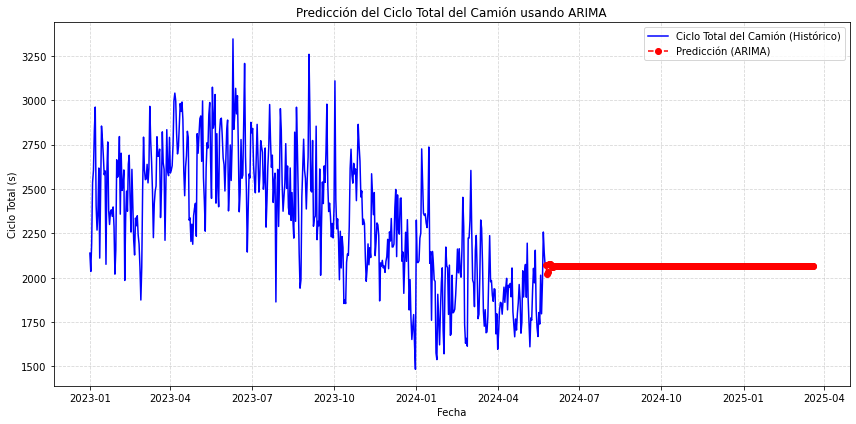

Predicciones para los próximos ciclos:
2024-05-25    2070.946325
2024-05-26    2020.143398
2024-05-27    2032.858199
2024-05-28    2079.475881
2024-05-29    2080.007313
                 ...     
2025-03-16    2066.648961
2025-03-17    2066.648961
2025-03-18    2066.648961
2025-03-19    2066.648961
2025-03-20    2066.648961
Freq: D, Name: predicted_mean, Length: 300, dtype: float64


In [20]:
# Predicciones para los proximos 300 ciclos de carguio y transporte de mineral.
steps = 300  # Número de ciclos a predecir
predicciones = model_fit.forecast(steps=steps)

# Crear un rango de fechas para las predicciones
fechas_predicciones = pd.date_range(start=df.index[-1], periods=steps+1, freq='D')[1:]

# Graficar la serie histórica y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['truck_total_cycle'], label='Ciclo Total del Camión (Histórico)', color='blue')
plt.plot(fechas_predicciones, predicciones, label='Predicción (ARIMA)', color='red', linestyle='--', marker='o')

# Configurar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Ciclo Total (s)')
plt.title('Predicción del Ciclo Total del Camión usando ARIMA')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir las predicciones
print("Predicciones para los próximos ciclos:")
print(predicciones)

<h3>Nota:</h3>el código anterior, implementa un modelo ARIMA (5,1,0) para predecir la tendencia de los proximos 300 ciclos de carguio y transporte.

<h2>7. Análisis Estadístico para Identificar factores criticos</h2>

En el modelo de regresión lineal utilizado para predecir el rendimiento (tonelaje movido), algunas variables mostraron ser críticas en el rendimiento. Para medir su impacto, se pueden evaluar los coeficientes del modelo entrenado, ya que estos representan la influencia de cada variable en la variable dependiente (rendimiento). El proceso es el siguiente:

Código para analizar la importancia de las variables:

In [21]:
# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes de las variables predictoras
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})

# Ordenar por magnitud del coeficiente para ver la importancia relativa
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)
print(coeficientes)


                Variable  Coeficiente
0       eficiencia_ciclo    17.474891
2  rendimiento_distancia    11.181810
1     productividad_pala    -1.736313


<h2>7.1 Importancia de las variables predictoras en la regresión lineal.</h2>

                Variable  Coeficiente
0       eficiencia_ciclo    27.954402
2  rendimiento_distancia    -5.673743
1     productividad_pala  -240.897952


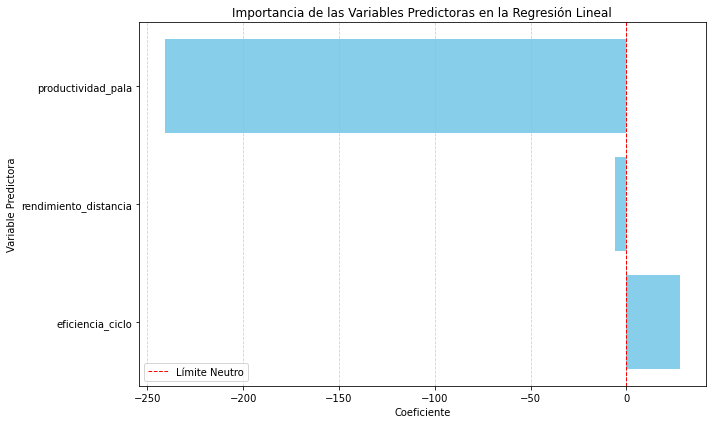

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Preprocesar los datos: filtrar registros con valores válidos
df = df[(df['eficiencia_ciclo'] > 0) & (df['puntaje_total'] > 0)]

# Eliminar filas con valores NaN o infinitos en las columnas de interés
df = df.replace([np.inf, -np.inf], np.nan)  # Reemplazar valores infinitos con NaN
df = df.dropna(subset=['eficiencia_ciclo', 'productividad_pala', 'rendimiento_distancia','ton'])  # Eliminar filas con NaN

# Seleccionar las variables
X = df[['eficiencia_ciclo', 'productividad_pala', 'rendimiento_distancia']]
y = df['ton']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes de las variables predictoras
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo.coef_
})

# Ordenar por magnitud del coeficiente para visualizar la importancia relativa
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)

# Imprimir los coeficientes
print(coeficientes)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variable Predictora')
plt.title('Importancia de las Variables Predictoras en la Regresión Lineal')
plt.axvline(0, color='red', linestyle='--', linewidth=1, label='Límite Neutro')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()





<h2>Conclusiones de los factores criticos</h2>
Eficiencia del Ciclo es la variable más importante para mejorar el rendimiento. Incrementarla tendrá un impacto positivo significativo.
Rendimiento de la Distancia afecta negativamente el rendimiento, lo que destaca la importancia de optimizar las rutas y minimizar tiempos muertos en trayectos.
Productividad de la Pala, aunque intuitivamente debería ser positiva, tiene un coeficiente negativo en este análisis, lo que sugiere problemas de coordinación o ineficiencias en el proceso operativo que deben investigarse y corregirse.
<h3>Recomendaciones:</h3>
Priorizar la eficiencia del ciclo mediante la mejora en la carga y transporte.
Reducir distancias innecesarias en los trayectos de los camiones.
Auditar el proceso de carguío para identificar y resolver las causas del impacto negativo asociado a la productividad de las palas.

<h2>8. Propuesta de Mejora Operativa</h2>
Para optimizar las operaciones de carguío y transporte, se sugiere implementar un plan integral que abarque optimización operativa, monitoreo continuo y mantenimiento preventivo adaptado a las condiciones de baja producción.<br>

<h3>1. Optimización Operativa</h3>
Uso eficiente de los mejores equipos:<br>

Priorizar el uso de CAEX61 y PH06 en tareas críticas, ya que representan las combinaciones más eficientes.<br>
Redistribuir tareas a equipos con bajo rendimiento para balancear la carga operativa, mientras se implementan medidas para mejorar su eficiencia.<br>

Sincronización entre equipos:<br>

Mejorar la coordinación entre palas y camiones mediante herramientas digitales para evitar tiempos muertos. Por ejemplo, sincronizar los tiempos promedio de ciclo de las palas (305.07 s) con la llegada de los camiones.<br>
<h3>2. Monitoreo Continuo</h3><br>
Implementar dashboards interactivos en Power BI o Tableau para visualizar en tiempo real métricas como tonelaje, tiempos de ciclo y distancias recorridas.<br>
Configurar alertas automáticas para detectar caídas de productividad o ciclos inusualmente largos, permitiendo acciones correctivas rápidas.<br>
<h3>3. Plan de Mantenimiento Preventivo</h3>
Programación ajustada a períodos de baja producción:<br>

Utilizar los períodos identificados con menor tonelaje movido para realizar mantenimientos preventivos en equipos críticos.<br>
Garantizar que los mantenimientos de CAEX61 y PH06 no interfieran con la producción durante sus horarios de máxima utilización.<br>

Mantenimiento predictivo:<br>

Basar las intervenciones en modelos predictivos que utilicen datos históricos de ciclos, tonelaje y tiempos operativos para anticipar fallas.<br>
Priorizar camiones y palas con mayor variabilidad en su rendimiento, enfocándose en aquellos con ciclos inconsistentes o bajo tonelaje movido.<br>

Planificación de recursos:<br>

Asegurar la disponibilidad de repuestos clave para los equipos más utilizados, minimizando el tiempo de inactividad durante las intervenciones.<br>
<h3>4. Reducción de Variabilidad</h3>
Análisis de outliers:<br>

Identificar las razones detrás de los valores atípicos en tonelaje, tiempos de ciclo y distancia recorrida.<br>

Estandarización de procesos:<br>

Documentar y replicar las mejores prácticas operativas observadas en PH06 y CAEX61 para el resto de los equipos.<br>

<h3>Impacto Esperado</h3>
Implementar esta propuesta permitirá:<br>

Aumentar la disponibilidad operativa de los equipos clave al reducir el tiempo de inactividad por fallas no programadas.<br>
Mejorar la productividad mediante la sincronización eficiente entre equipos y la optimización de rutas.<br>
Reducir los costos asociados a ineficiencias y mantenimientos reactivos al incorporar modelos predictivos.<br>
Garantizar una operación más estable y predecible, minimizando las interrupciones durante los períodos de alta producción.<br>
Este enfoque combina análisis detallado, herramientas tecnológicas y una planificación estratégica del mantenimiento para maximizar la eficiencia y la rentabilidad de las operaciones.